In [1]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import xarray as xr
import pandas as pd
import numpy as np
import iris
import geopandas

In [2]:
from dask.distributed import Client

In [3]:
client = Client()
client

2024-12-16 10:56:58,184 - distributed.preloading - INFO - Creating preload: /g/data/hh5/public/apps/dask-optimiser/schedplugin.py
2024-12-16 10:56:58,187 - distributed.utils - INFO - Reload module schedplugin from .py file
2024-12-16 10:56:58,190 - distributed.preloading - INFO - Import preload module: /g/data/hh5/public/apps/dask-optimiser/schedplugin.py


Modifying workers


Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: /node/gadi-cpu-bdw-0023.gadi.nci.org.au/34989/proxy/8787/status,
Dashboard: /node/gadi-cpu-bdw-0023.gadi.nci.org.au/34989/proxy/8787/status,Workers: 7
Total threads: 7,Total memory: 0 B
Status: running,Using processes: True
Comm: tcp://127.0.0.1:40135,Workers: 7
Dashboard: /node/gadi-cpu-bdw-0023.gadi.nci.org.au/34989/proxy/8787/status,Total threads: 7
Started: Just now,Total memory: 0 B
Comm: tcp://127.0.0.1:39729,Total threads: 1
Dashboard: /node/gadi-cpu-bdw-0023.gadi.nci.org.au/34989/proxy/39709/status,Memory: 0 B
Nanny: tcp://127.0.0.1:38721,


In [56]:
iris.load(path+"umnsaa_pverc000") 

[<iris 'Cube' of upward_air_velocity / (m s-1) (time: 5; pressure: 16; latitude: 450; longitude: 450)>,
<iris 'Cube' of wet_bulb_potential_temperature / (K) (time: 5; pressure: 16; latitude: 450; longitude: 450)>,
<iris 'Cube' of x_wind / (m s-1) (time: 5; pressure: 16; latitude: 451; longitude: 450)>,
<iris 'Cube' of y_wind / (m s-1) (time: 5; pressure: 16; latitude: 451; longitude: 450)>]

In [77]:
def load_access_rns(fname,var_name):

    data = iris.load(fname, var_name)                  
    data_da = xr.DataArray.from_iris(data[0])

    return data_da

path = "/scratch/public/mjl561/SY_1/RAL3P2/um/"

fnames = [path+"umnsaa_pverb000",
          path+"umnsaa_pverb012"]
var_name = "air_pressure_at_sea_level"
pres = xr.concat([load_access_rns(f,var_name) for f in fnames],dim="time")

fnames = [path+"umnsaa_pvera000",
          path+"umnsaa_pvera012"]
var_name = "x_wind"
u_ds = xr.concat([load_access_rns(f,var_name) for f in fnames],dim="time")

var_name = "y_wind"
v_ds = xr.concat([load_access_rns(f,var_name) for f in fnames],dim="time")

wind_ds = xr.Dataset({"u":u_ds,"v":v_ds})


fnames = [path+"umnsaa_pverc000",
          path+"umnsaa_pverc012"]
var_name = "x_wind"
u_ds = xr.concat([load_access_rns(f,var_name) for f in fnames],dim="time")

var_name = "y_wind"
v_ds = xr.concat([load_access_rns(f,var_name) for f in fnames],dim="time")

var_name = "upward_air_velocity"
w_ds = xr.concat([load_access_rns(f,var_name) for f in fnames],dim="time")

pwind_ds = xr.Dataset({"u":u_ds,"v":v_ds,"w":w_ds.interp(longitude=v_ds.longitude,latitude=v_ds.latitude)})

In [107]:
path = "/scratch/public/mjl561/SY_1_L/RAL3P2/um/"

fnames = [path+"umnsaa_pverb000",
          path+"umnsaa_pverb012"]
var_name = "air_pressure_at_sea_level"
pres_l = xr.concat([load_access_rns(f,var_name) for f in fnames],dim="time")

fnames = [path+"umnsaa_pvera000",
          path+"umnsaa_pvera012"]
var_name = "x_wind"
u_ds = xr.concat([load_access_rns(f,var_name) for f in fnames],dim="time")

var_name = "y_wind"
v_ds = xr.concat([load_access_rns(f,var_name) for f in fnames],dim="time")

wind_ds_l = xr.Dataset({"u":u_ds,"v":v_ds})


fnames = [path+"umnsaa_pverc000",
          path+"umnsaa_pverc012"]
var_name = "x_wind"
u_ds = xr.concat([load_access_rns(f,var_name) for f in fnames],dim="time")

var_name = "y_wind"
v_ds = xr.concat([load_access_rns(f,var_name) for f in fnames],dim="time")

var_name = "upward_air_velocity"
w_ds = xr.concat([load_access_rns(f,var_name) for f in fnames],dim="time")

pwind_ds_l = xr.Dataset({"u":u_ds,"v":v_ds,"w":w_ds.interp(longitude=v_ds.longitude,latitude=v_ds.latitude)})

Text(0.5, 1.0, 'Sydney-Large 1 km 10 m winds (2017-01-01 06:00)')

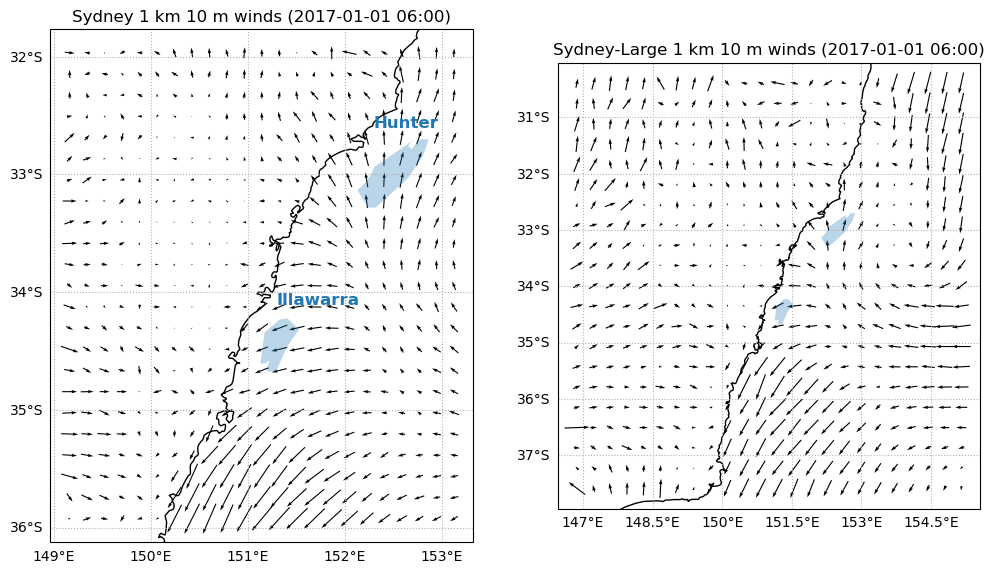

In [122]:
plt.figure(figsize=[12,12])

t="2017-01-01 06:00"
step=20

offshore_regions = geopandas.read_file("/g/data/gb02/ab4502/coastline_data/Offshore_Renewable_Energy_Infrastructure_Regions/Offshore_Renewable_Energy_Infrastructure_Regions.shp")

ax=plt.subplot(1,2,1,projection=ccrs.PlateCarree())
wind_ds.sel(time=t).isel(latitude=slice(0,-1,step),longitude=slice(0,-1,step)).plot.quiver(x="longitude",y="latitude",u="u",v="v")
geopandas.GeoDataFrame(offshore_regions).loc[[0],"geometry"].plot(ax=ax,alpha=0.3)
geopandas.GeoDataFrame(offshore_regions).loc[[8],"geometry"].plot(ax=ax,alpha=0.3)
ax.coastlines()
ax.gridlines(draw_labels=["left","bottom"],ls=":")
ax.text(152.3,-32.6,"Hunter",color="tab:blue",fontdict={"weight":"bold","size":12})
ax.text(151.3,-34.1,"Illawarra",color="tab:blue",fontdict={"weight":"bold","size":12})

plt.title("Sydney 1 km 10 m winds (2017-01-01 06:00)")

step=40

ax=plt.subplot(1,2,2,projection=ccrs.PlateCarree())
wind_ds_l.sel(time=t).isel(latitude=slice(0,-1,step),longitude=slice(0,-1,step)).plot.quiver(x="longitude",y="latitude",u="u",v="v")
geopandas.GeoDataFrame(offshore_regions).loc[[0],"geometry"].plot(ax=ax,alpha=0.3)
geopandas.GeoDataFrame(offshore_regions).loc[[8],"geometry"].plot(ax=ax,alpha=0.3)
ax.coastlines()
ax.gridlines(draw_labels=["left","bottom"],ls=":")


plt.title("Sydney-Large 1 km 10 m winds (2017-01-01 06:00)")

Text(0.5, 1.0, 'Sydney-Large 1 km 10 m winds (2017-01-01 06:00)')

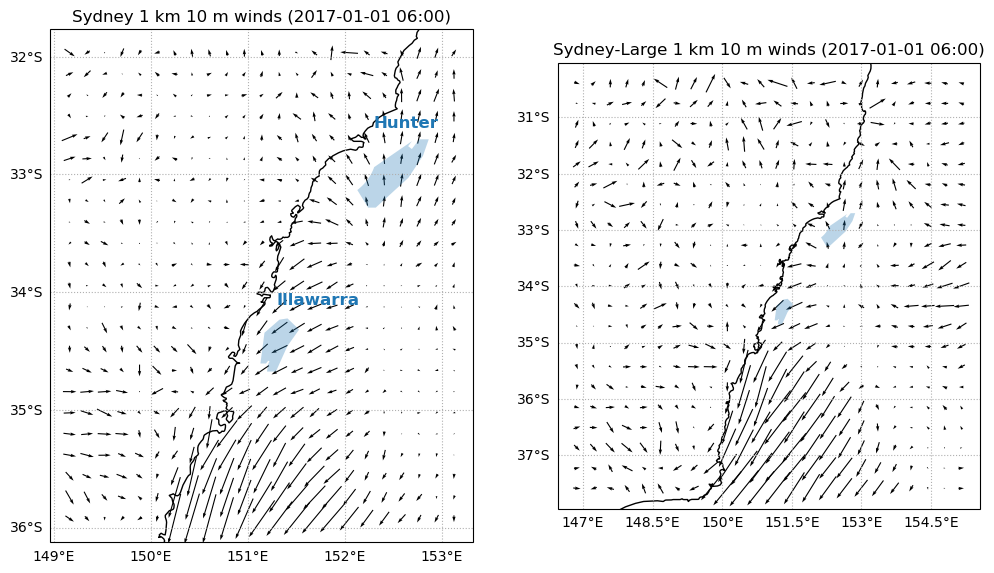

In [120]:
plt.figure(figsize=[12,12])

t="2017-01-01 06:00"
step=20

offshore_regions = geopandas.read_file("/g/data/gb02/ab4502/coastline_data/Offshore_Renewable_Energy_Infrastructure_Regions/Offshore_Renewable_Energy_Infrastructure_Regions.shp")

ax=plt.subplot(1,2,1,projection=ccrs.PlateCarree())
(wind_ds-wind_ds.mean("time")).sel(time=t).isel(latitude=slice(0,-1,step),longitude=slice(0,-1,step)).plot.quiver(x="longitude",y="latitude",u="u",v="v")
geopandas.GeoDataFrame(offshore_regions).loc[[0],"geometry"].plot(ax=ax,alpha=0.3)
geopandas.GeoDataFrame(offshore_regions).loc[[8],"geometry"].plot(ax=ax,alpha=0.3)
ax.coastlines()
ax.gridlines(draw_labels=["left","bottom"],ls=":")
ax.text(152.3,-32.6,"Hunter",color="tab:blue",fontdict={"weight":"bold","size":12})
ax.text(151.3,-34.1,"Illawarra",color="tab:blue",fontdict={"weight":"bold","size":12})

plt.title("Sydney 1 km 10 m winds (2017-01-01 06:00)")

step=40

ax=plt.subplot(1,2,2,projection=ccrs.PlateCarree())
(wind_ds_l-wind_ds_l.mean("time")).sel(time=t).isel(latitude=slice(0,-1,step),longitude=slice(0,-1,step)).plot.quiver(x="longitude",y="latitude",u="u",v="v")
geopandas.GeoDataFrame(offshore_regions).loc[[0],"geometry"].plot(ax=ax,alpha=0.3)
geopandas.GeoDataFrame(offshore_regions).loc[[8],"geometry"].plot(ax=ax,alpha=0.3)
ax.coastlines()
ax.gridlines(draw_labels=["left","bottom"],ls=":")


plt.title("Sydney-Large 1 km 10 m winds (2017-01-01 06:00)")

In [124]:
wind_ds_l.longitude

<xarray.DataArray 'longitude' (longitude: 960)> Size: 8kB
array([146.8695, 146.8785, 146.8875, ..., 155.4825, 155.4915, 155.5005])
Coordinates:
  * longitude                (longitude) float64 8kB 146.9 146.9 ... 155.5 155.5
    forecast_reference_time  datetime64[ns] 8B 2017-01-01
    height                   float64 8B 10.0
Attributes:
    standard_name:  longitude
    units:          degrees

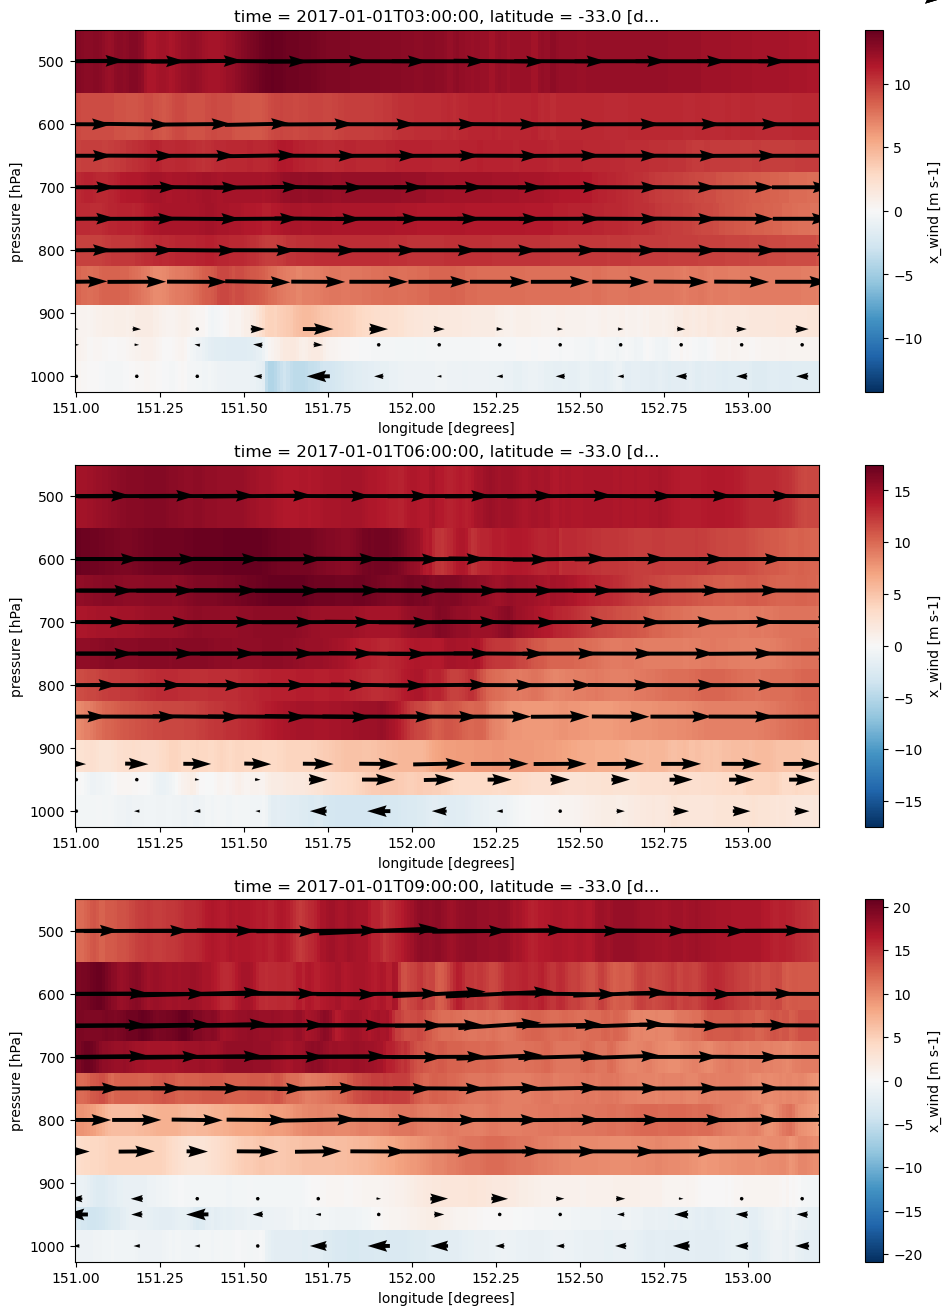

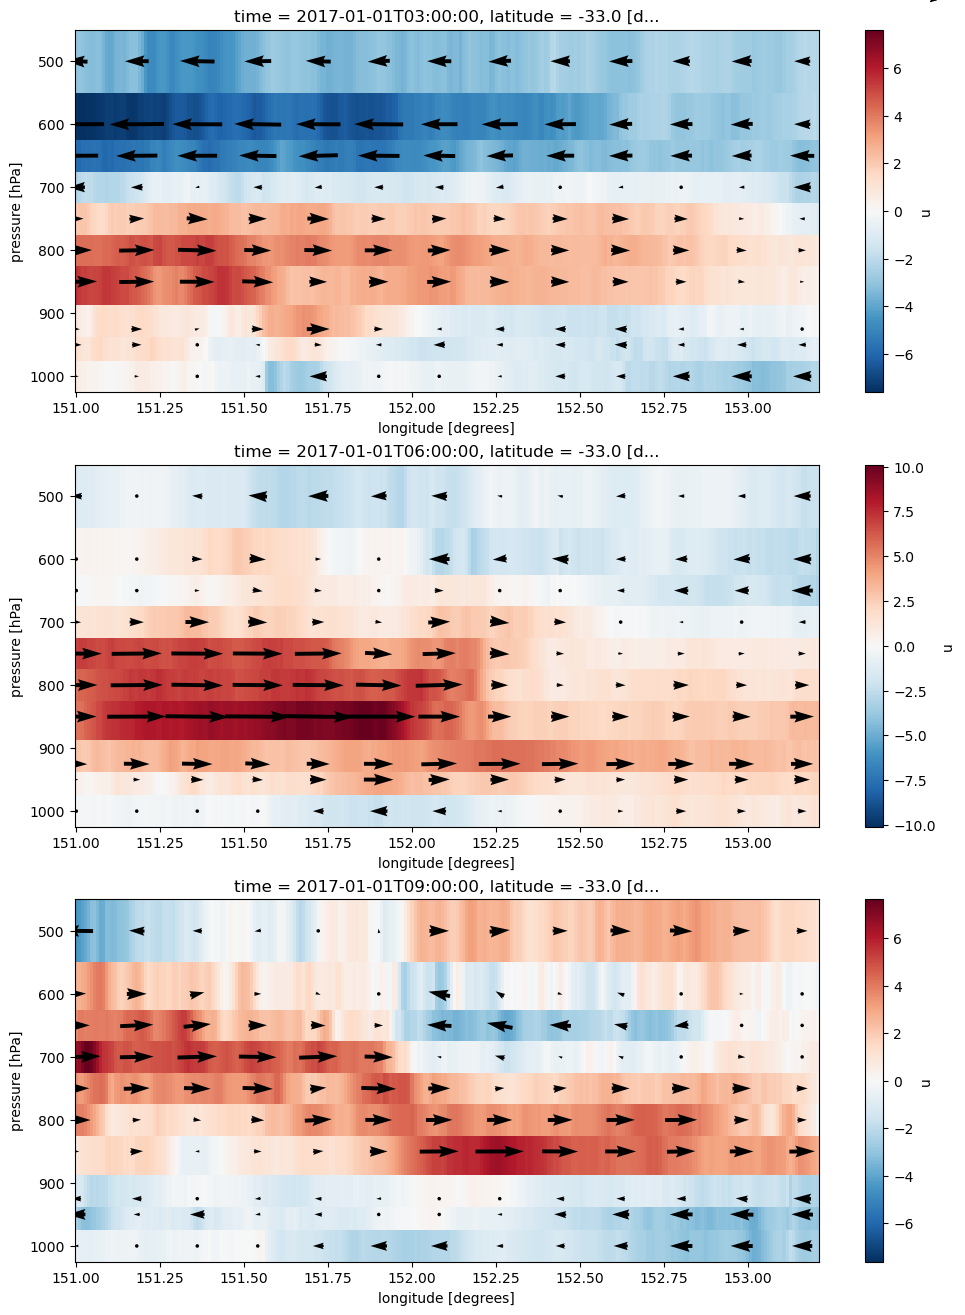

In [105]:
plt.figure(figsize=[12,16])

lat = -33
lons = slice(151,pwind_ds.longitude.max())

plt.subplot(3,1,1)
t="2017-01-01 03:00"

(pwind_ds).sel(time=t,latitude=lat,method="nearest")\
        .sel(longitude=lons,pressure=slice(500,1000)).u.plot(x="longitude",y="pressure")
x_step=20
(pwind_ds).sel(time=t,latitude=lat,method="nearest")\
        .sel(longitude=lons,pressure=slice(500,1000)).\
        isel(longitude=slice(0,-1,x_step)).plot.quiver(x="longitude",y="pressure",u="u",v="w",scale=100)
plt.gca().invert_yaxis()


plt.subplot(3,1,2)
t="2017-01-01 06:00"

(pwind_ds).sel(time=t,latitude=lat,method="nearest")\
        .sel(longitude=lons,pressure=slice(500,1000)).u.plot(x="longitude",y="pressure")
x_step=20
(pwind_ds).sel(time=t,latitude=lat,method="nearest")\
        .sel(longitude=lons,pressure=slice(500,1000)).\
        isel(longitude=slice(0,-1,x_step)).plot.quiver(x="longitude",y="pressure",u="u",v="w",scale=100)
plt.gca().invert_yaxis()


plt.subplot(3,1,3)
t="2017-01-01 09:00"

(pwind_ds).sel(time=t,latitude=lat,method="nearest")\
        .sel(longitude=lons,pressure=slice(500,1000)).u.plot(x="longitude",y="pressure")
x_step=20
(pwind_ds).sel(time=t,latitude=lat,method="nearest")\
        .sel(longitude=lons,pressure=slice(500,1000)).\
        isel(longitude=slice(0,-1,x_step)).plot.quiver(x="longitude",y="pressure",u="u",v="w",scale=100)
plt.gca().invert_yaxis()

plt.suptitle("Hunter cross-section")


#WITH DAILY MEAN REMOVED

plt.figure(figsize=[12,16])

plt.subplot(3,1,1)
t="2017-01-01 03:00"

(pwind_ds-pwind_ds.mean("time")).sel(time=t,latitude=-33,method="nearest")\
        .sel(longitude=slice(151,pwind_ds.longitude.max()),pressure=slice(500,1000)).u.plot(x="longitude",y="pressure")
x_step=20
(pwind_ds-pwind_ds.mean("time")).sel(time=t,latitude=-33,method="nearest")\
        .sel(longitude=slice(151,pwind_ds.longitude.max()),pressure=slice(500,1000)).\
        isel(longitude=slice(0,-1,x_step)).plot.quiver(x="longitude",y="pressure",u="u",v="w",scale=100)
plt.gca().invert_yaxis()


plt.subplot(3,1,2)
t="2017-01-01 06:00"

(pwind_ds-pwind_ds.mean("time")).sel(time=t,latitude=-33,method="nearest")\
        .sel(longitude=slice(151,pwind_ds.longitude.max()),pressure=slice(500,1000)).u.plot(x="longitude",y="pressure")
x_step=20
(pwind_ds-pwind_ds.mean("time")).sel(time=t,latitude=-33,method="nearest")\
        .sel(longitude=slice(151,pwind_ds.longitude.max()),pressure=slice(500,1000)).\
        isel(longitude=slice(0,-1,x_step)).plot.quiver(x="longitude",y="pressure",u="u",v="w",scale=100)
plt.gca().invert_yaxis()


plt.subplot(3,1,3)
t="2017-01-01 09:00"

(pwind_ds-pwind_ds.mean("time")).sel(time=t,latitude=-33,method="nearest")\
        .sel(longitude=slice(151,pwind_ds.longitude.max()),pressure=slice(500,1000)).u.plot(x="longitude",y="pressure")
x_step=20
(pwind_ds-pwind_ds.mean("time")).sel(time=t,latitude=-33,method="nearest")\
        .sel(longitude=slice(151,pwind_ds.longitude.max()),pressure=slice(500,1000)).\
        isel(longitude=slice(0,-1,x_step)).plot.quiver(x="longitude",y="pressure",u="u",v="w",scale=100)
plt.gca().invert_yaxis()

plt.suptitle("Hunter cross-section, daily mean removed")

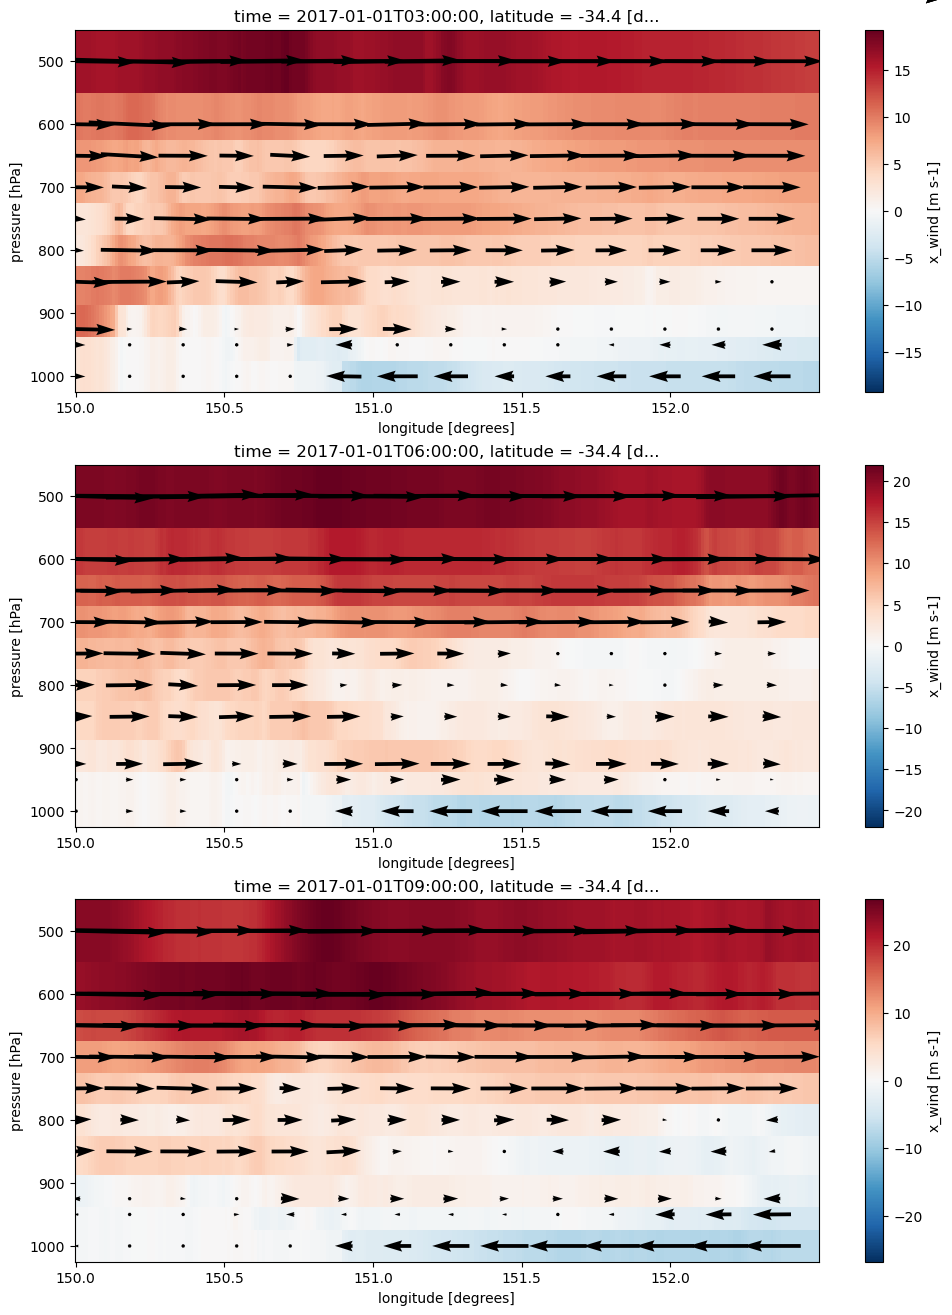

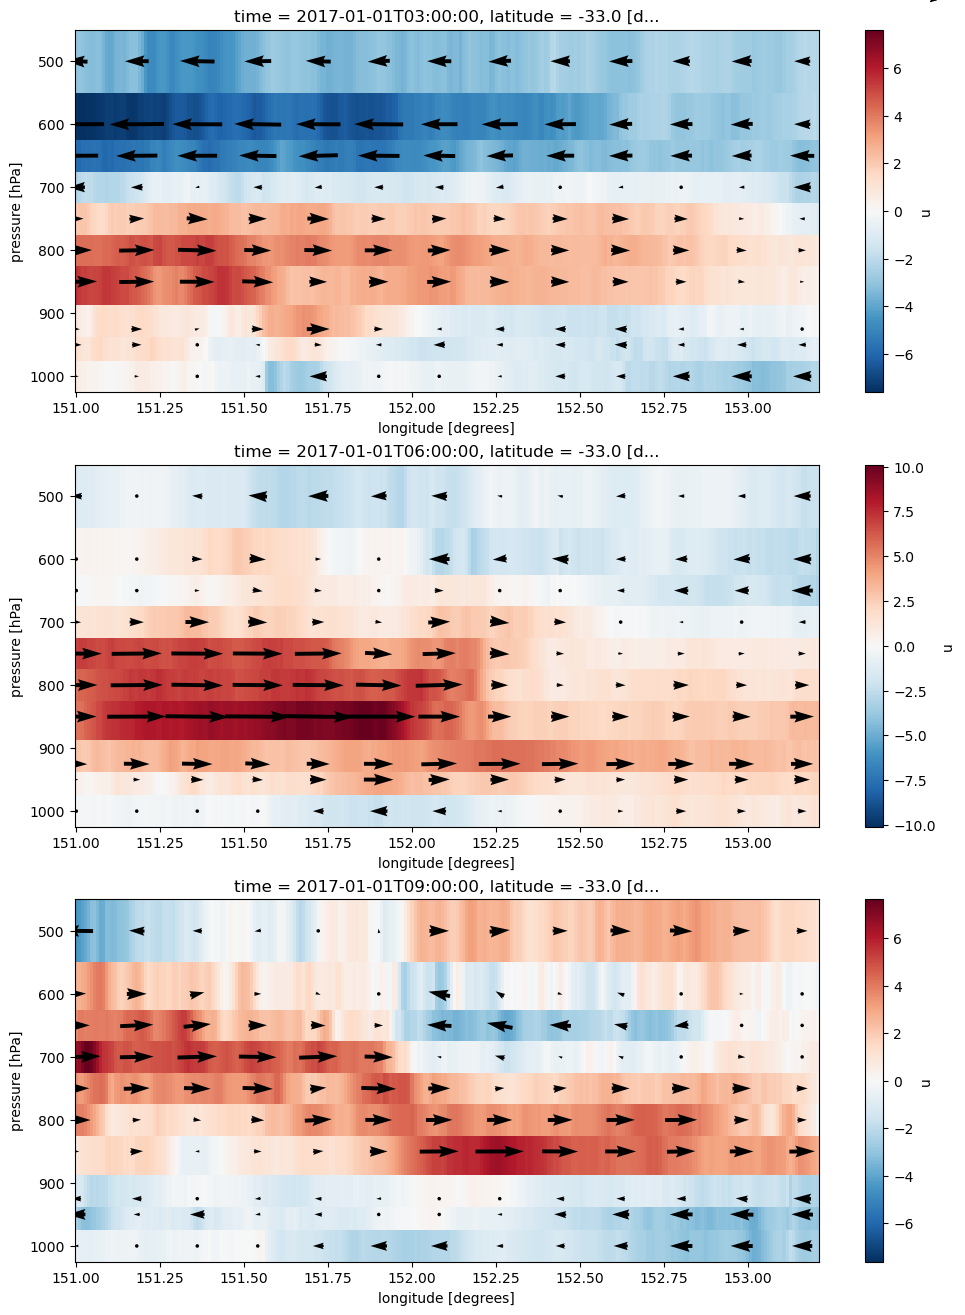

In [106]:
plt.figure(figsize=[12,16])

lat = -34.4
lons = slice(150,152.5)

plt.subplot(3,1,1)
t="2017-01-01 03:00"

(pwind_ds).sel(time=t,latitude=lat,method="nearest")\
        .sel(longitude=lons,pressure=slice(500,1000)).u.plot(x="longitude",y="pressure")
x_step=20
(pwind_ds).sel(time=t,latitude=lat,method="nearest")\
        .sel(longitude=lons,pressure=slice(500,1000)).\
        isel(longitude=slice(0,-1,x_step)).plot.quiver(x="longitude",y="pressure",u="u",v="w",scale=100)
plt.gca().invert_yaxis()


plt.subplot(3,1,2)
t="2017-01-01 06:00"

(pwind_ds).sel(time=t,latitude=lat,method="nearest")\
        .sel(longitude=lons,pressure=slice(500,1000)).u.plot(x="longitude",y="pressure")
x_step=20
(pwind_ds).sel(time=t,latitude=lat,method="nearest")\
        .sel(longitude=lons,pressure=slice(500,1000)).\
        isel(longitude=slice(0,-1,x_step)).plot.quiver(x="longitude",y="pressure",u="u",v="w",scale=100)
plt.gca().invert_yaxis()


plt.subplot(3,1,3)
t="2017-01-01 09:00"

(pwind_ds).sel(time=t,latitude=lat,method="nearest")\
        .sel(longitude=lons,pressure=slice(500,1000)).u.plot(x="longitude",y="pressure")
x_step=20
(pwind_ds).sel(time=t,latitude=lat,method="nearest")\
        .sel(longitude=lons,pressure=slice(500,1000)).\
        isel(longitude=slice(0,-1,x_step)).plot.quiver(x="longitude",y="pressure",u="u",v="w",scale=100)
plt.gca().invert_yaxis()

plt.suptitle("Illawarra cross-section")

#WITH DAILY MEAN REMOVED

plt.figure(figsize=[12,16])

plt.subplot(3,1,1)
t="2017-01-01 03:00"

(pwind_ds-pwind_ds.mean("time")).sel(time=t,latitude=-33,method="nearest")\
        .sel(longitude=slice(151,pwind_ds.longitude.max()),pressure=slice(500,1000)).u.plot(x="longitude",y="pressure")
x_step=20
(pwind_ds-pwind_ds.mean("time")).sel(time=t,latitude=-33,method="nearest")\
        .sel(longitude=slice(151,pwind_ds.longitude.max()),pressure=slice(500,1000)).\
        isel(longitude=slice(0,-1,x_step)).plot.quiver(x="longitude",y="pressure",u="u",v="w",scale=100)
plt.gca().invert_yaxis()


plt.subplot(3,1,2)
t="2017-01-01 06:00"

(pwind_ds-pwind_ds.mean("time")).sel(time=t,latitude=-33,method="nearest")\
        .sel(longitude=slice(151,pwind_ds.longitude.max()),pressure=slice(500,1000)).u.plot(x="longitude",y="pressure")
x_step=20
(pwind_ds-pwind_ds.mean("time")).sel(time=t,latitude=-33,method="nearest")\
        .sel(longitude=slice(151,pwind_ds.longitude.max()),pressure=slice(500,1000)).\
        isel(longitude=slice(0,-1,x_step)).plot.quiver(x="longitude",y="pressure",u="u",v="w",scale=100)
plt.gca().invert_yaxis()


plt.subplot(3,1,3)
t="2017-01-01 09:00"

(pwind_ds-pwind_ds.mean("time")).sel(time=t,latitude=-33,method="nearest")\
        .sel(longitude=slice(151,pwind_ds.longitude.max()),pressure=slice(500,1000)).u.plot(x="longitude",y="pressure")
x_step=20
(pwind_ds-pwind_ds.mean("time")).sel(time=t,latitude=-33,method="nearest")\
        .sel(longitude=slice(151,pwind_ds.longitude.max()),pressure=slice(500,1000)).\
        isel(longitude=slice(0,-1,x_step)).plot.quiver(x="longitude",y="pressure",u="u",v="w",scale=100)
plt.gca().invert_yaxis()

plt.suptitle("Illawarra cross-section, mean removed")
